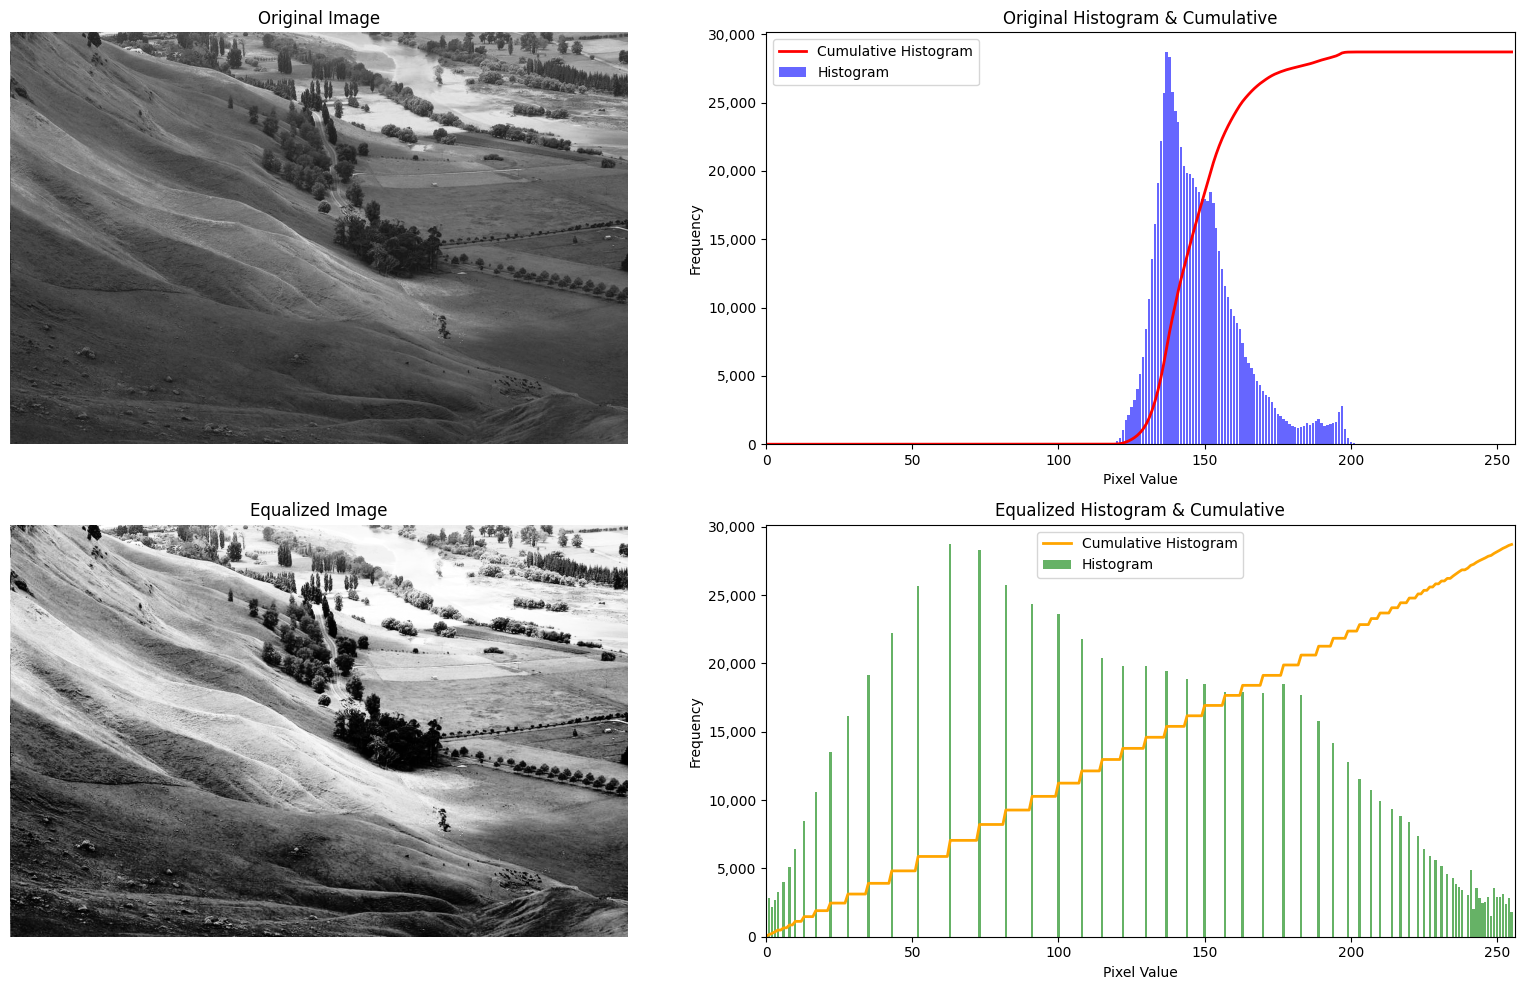

In [13]:
import cv2, numpy as np, matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 이미지 읽기 (그레이스케일로)
image = cv2.imread('histogram_example.jpg', cv2.IMREAD_GRAYSCALE)

# 1. 히스토그램 계산 (numpy 사용)
hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])

# 2. 누적 분포 함수 (CDF) 계산
cdf = hist.cumsum()  # 누적 합

# 3. CDF 정규화 (0-255 범위로)
cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
cdf_normalized = np.round(cdf_normalized).astype(np.uint8)

# 4. 히스토그램 평활화 (누적 CDF를 이용하여 픽셀 값 변환)
equalized_image = cdf_normalized[image]

# 5. 히스토그램 계산 (평활화된 이미지)
equalized_hist, _ = np.histogram(equalized_image.flatten(), bins=256, range=[0, 256])

# 6. 누적 히스토그램 계산 (평활화된 이미지)
equalized_cum_hist = np.cumsum(equalized_hist)
equalized_cum_hist_normalized = (equalized_cum_hist / equalized_cum_hist.max()) * equalized_hist.max()

# 시각화
plt.figure(figsize=(16, 10))

chart_idx = 0  # 서브플롯 인덱스 초기화

# 원본 이미지
plt.subplot(2, 2, chart_idx := chart_idx + 1)
plt.title("Original Image")
plt.axis('off')  # 축 제거
plt.imshow(image, cmap='gray')

# 원본 이미지 히스토그램 및 누적 히스토그램
plt.subplot(2, 2, chart_idx := chart_idx + 1)
plt.title("Original Histogram & Cumulative")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.bar(range(256), hist, color='blue', alpha=0.6, label='Histogram')
plt.plot(cdf/cdf.max()*hist.max(), color='red', label='Cumulative Histogram', linewidth=2)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda value, _: f'{int(value):,}'))
plt.xlim([0, 256])
plt.legend()

# 평활화된 이미지
plt.subplot(2, 2, chart_idx := chart_idx + 1)
plt.title("Equalized Image")
plt.axis('off')  # 축 제거
plt.imshow(equalized_image, cmap='gray')

# 평활화된 이미지 히스토그램 및 누적 히스토그램
plt.subplot(2, 2, chart_idx := chart_idx + 1)
plt.title("Equalized Histogram & Cumulative")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.bar(range(256), equalized_hist, color='green', alpha=0.6, label='Histogram')
plt.plot(equalized_cum_hist_normalized, color='orange', label='Cumulative Histogram', linewidth=2)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda value, _: f'{int(value):,}'))
plt.xlim([0, 256])
plt.legend()

# 레이아웃 정리 및 출력
plt.tight_layout()
plt.show()
